# CREDIT CARD FRAUD DETECTION

The role of Credit Cards as a method of transaction has gained a lot of popularity over the years as the world aims to be a cashless society. However, it is also important to consider that credit card fraud is ranked as the most common kind of identity theft fraud. One of the principal tasks that can be done by machine learning algorithms is classification. Every credit card transaction results in the generation of some data that can be used by machine learning algorithms to develop a classifier. Using such a classifier in real-time can help detect fraudulent transactions almost immediately resulting in not only time being saved but also money.

### Import the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix 

import gc
from datetime import datetime 
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import xgboost as xgb

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

### Reading data and checking missing values

In [2]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
data.shape

(284807, 31)

In [6]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
data.isnull().sum().sort_values(ascending = False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

So, there are no missing values in the dataset.

Fraudulent transactions: 0.17%

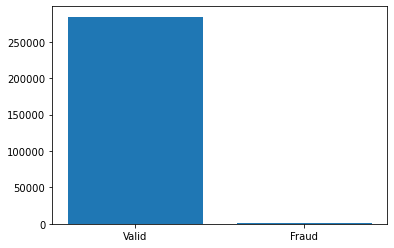

In [8]:
plt.bar(['Valid','Fraud'],list(data['Class'].value_counts()))
print("Fraudulent transactions: ", end='')
frauds= data['Class'].value_counts()[1]/sum(data['Class'].value_counts())
print(round(frauds*100,2), end='%')
plt.show()

Only 0.17% of transaction are fraudulent. That means the data is highly unbalanced with respect to target variable class. Unbalanced datasets may lead to bias in machine learning models and hence should be handled accordingly.

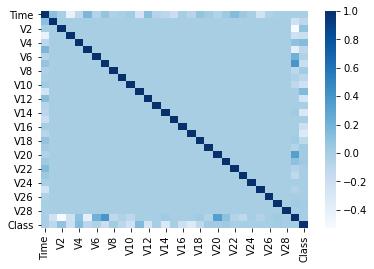

In [9]:
sns.heatmap(data.corr(), cmap='Blues')
plt.show()

The heat-map indicates that there are no high correlation values among the predictor columns. 
There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).


In [10]:
!pip install plotly==5.1.0

In [11]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go

class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')


Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

In [12]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

Hour  Class   Min      Max  Transactions        Sum        Mean   Median  \
0   0.0      0   0.0  7712.43          3961  256572.87   64.774772   12.990   
1   0.0      1   0.0   529.00             2     529.00  264.500000  264.500   
2   1.0      0   0.0  1769.69          2215  145806.76   65.826980   22.820   
3   1.0      1  59.0   239.93             2     298.93  149.465000  149.465   
4   2.0      0   0.0  4002.88          1555  106989.39   68.803466   17.900   

             Var  
0   45615.821201  
1  139920.500000  
2   20053.615770  
3   16367.832450  
4   45355.430437

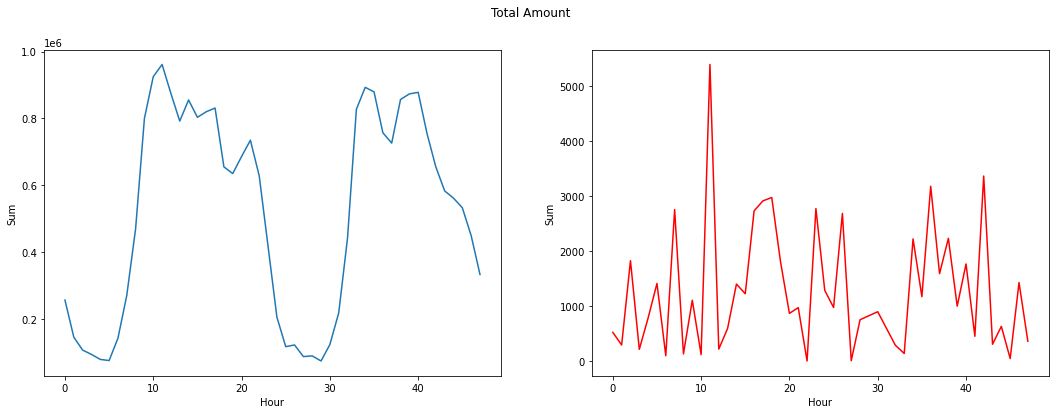

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

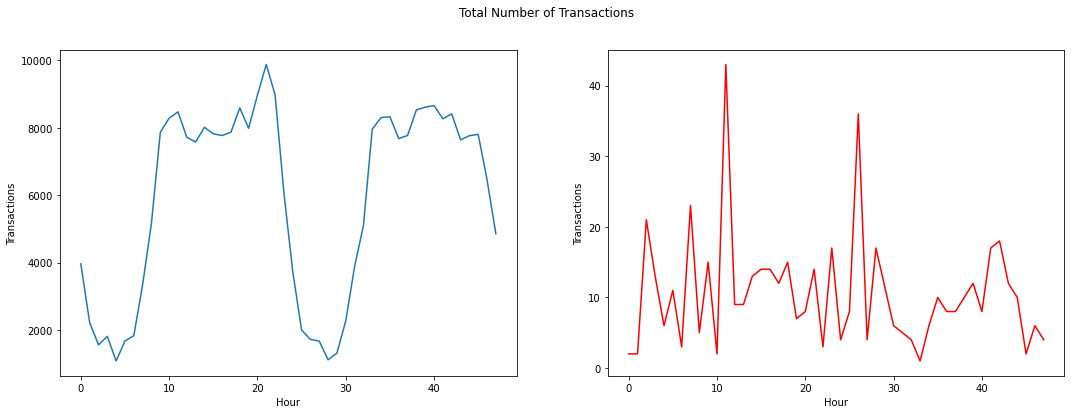

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

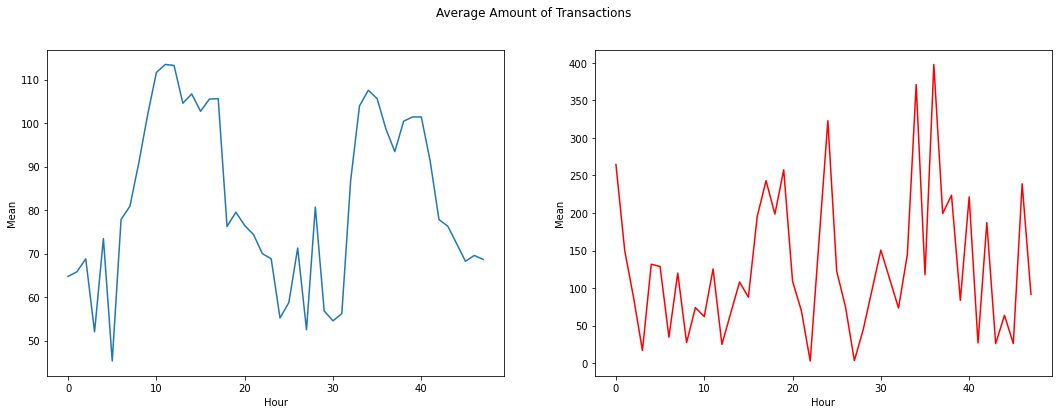

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

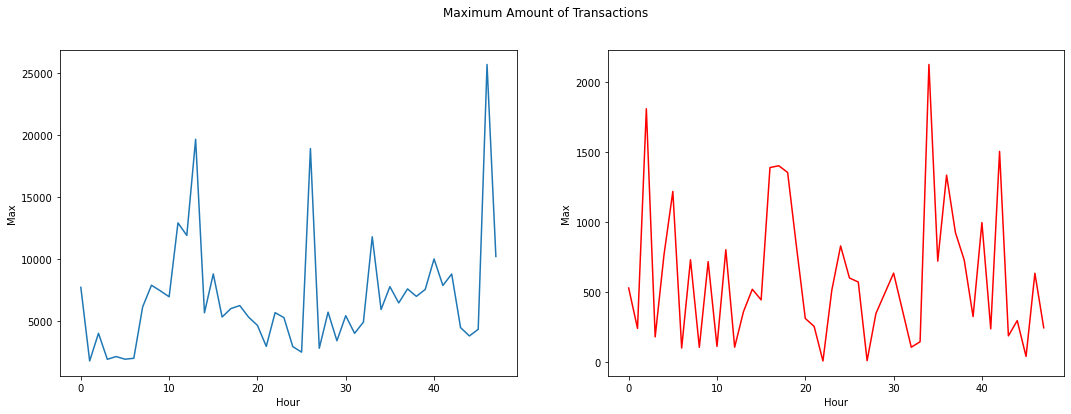

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

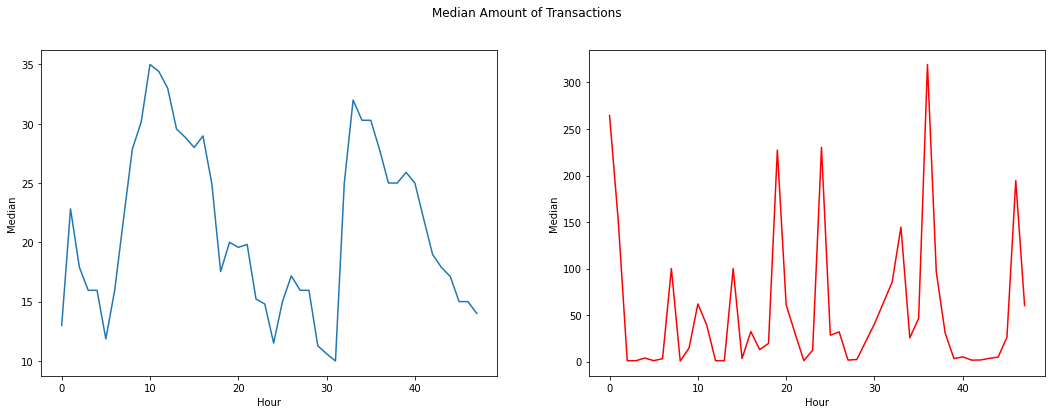

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

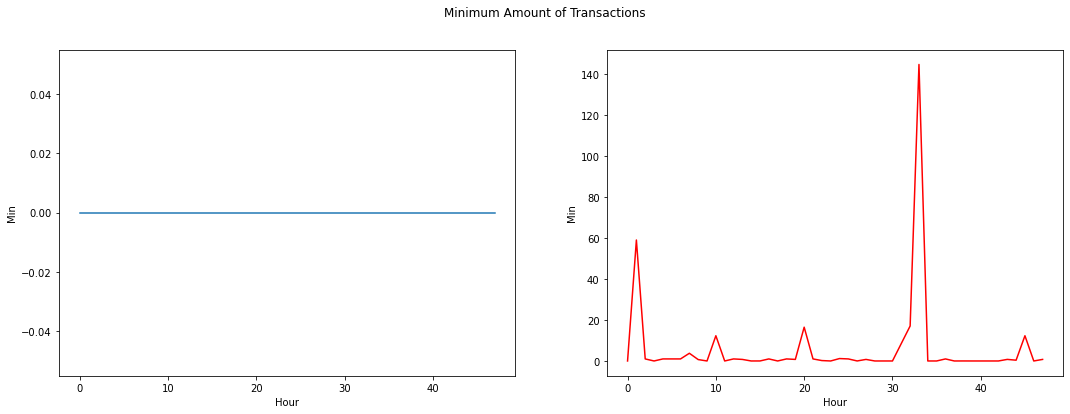

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

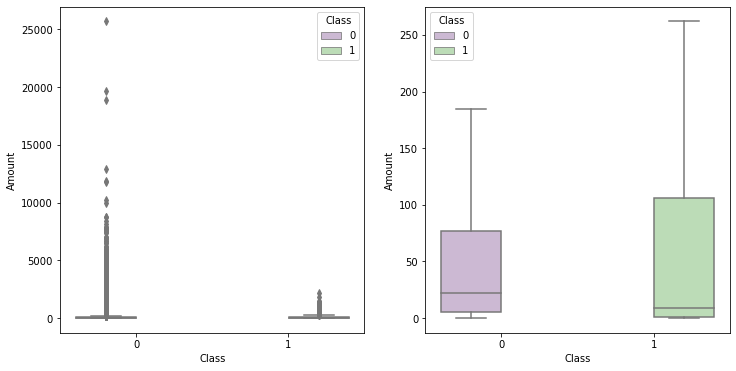

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data , palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data , palette="PRGn",showfliers=False)
plt.show();


In [20]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

In [22]:
fraud = data.loc[data['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

### Features density plot

C:\Users\Rishika Meel\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Users\Rishika Meel\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Users\Rishika Meel\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Users\Rishika Meel\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`

C:\Users\Rishika Meel\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Users\Rishika Meel\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Users\Rishika Meel\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

C:\Users\Rishika Meel\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`

<Figure size 432x288 with 0 Axes>

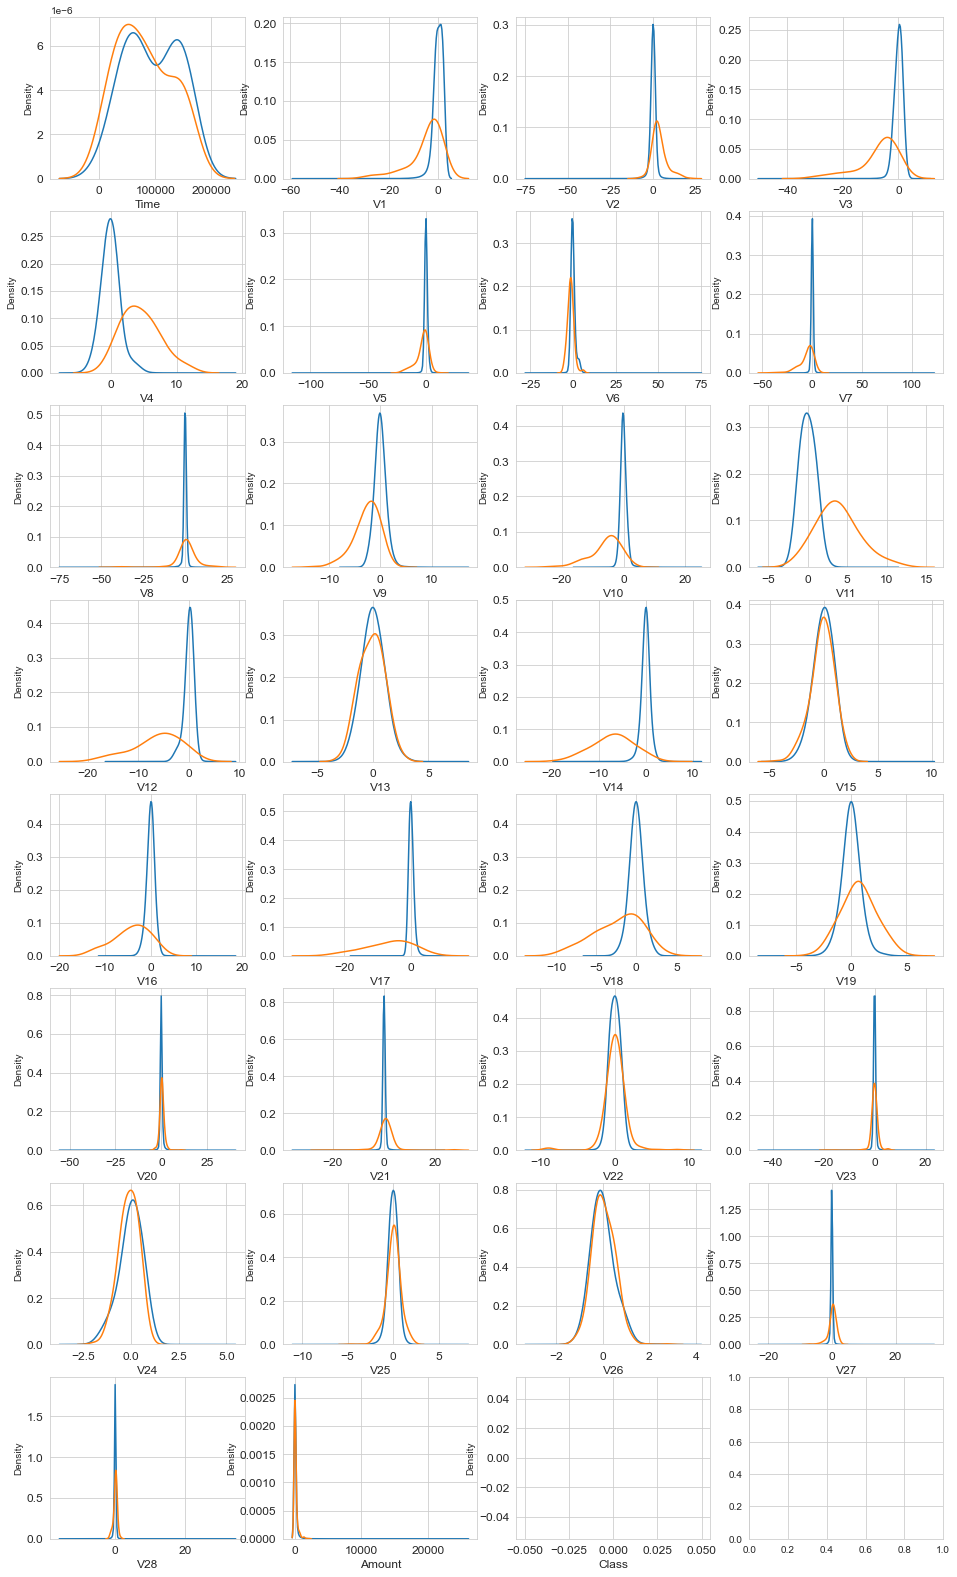

In [23]:
data = pd.read_csv("creditcard.csv")
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

## Predictive Models

In [15]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [11]:
X =data.iloc[:,:-1]
Y =data.iloc[:,-1]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2018, shuffle=True)

The test size of 0.2 indicates that 20% of the dataset is chosen to be the testing set.

### Random Forest Classifier

In [26]:
clf = RandomForestClassifier(n_jobs=4, random_state=2018, criterion='gini', n_estimators=100, verbose=False)

In [27]:
clf.fit(X_train, Y_train) 
Y_pred=clf.predict(X_test) 

In [28]:
print("Model Accuracy:", round(accuracy_score(Y_test, Y_pred),4))
print("Model Precision:", round(precision_score(Y_test, Y_pred),4))
print("Model Recall:", round(recall_score(Y_test, Y_pred),4))

Model Accuracy: 0.9995
Model Precision: 0.9625
Model Recall: 0.77


In [34]:
roc_auc_score(Y_test, Y_pred)

0.8849736203439907

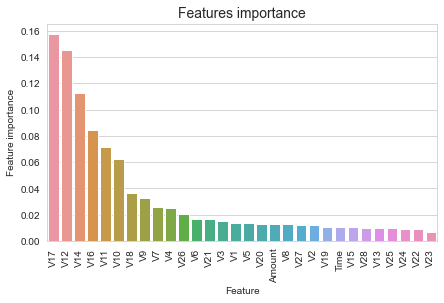

In [29]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

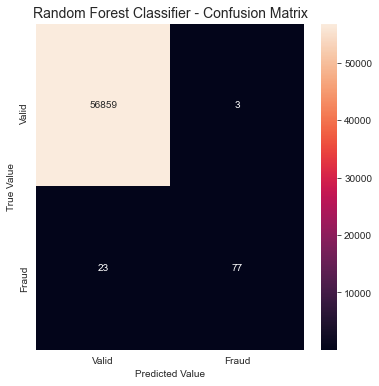

In [31]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Random Forest Classifier - Confusion Matrix", fontsize=14) 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

### AdaBoost Classifier

In [35]:
clf = AdaBoostClassifier(random_state=2018, algorithm='SAMME.R', learning_rate=0.8, n_estimators=100)

In [36]:
clf.fit(X_train, Y_train) 
Y_pred=clf.predict(X_test) 

In [37]:
print("Model Accuracy:", round(accuracy_score(Y_test, Y_pred),4))
print("Model Precision:", round(precision_score(Y_test, Y_pred),4))
print("Model Recall:", round(recall_score(Y_test, Y_pred),4))

Model Accuracy: 0.9993
Model Precision: 0.8452
Model Recall: 0.71


This model has lower accuracy, precision and recall than the random forest classifier model.

In [38]:
roc_auc_score(Y_test, Y_pred)

0.8548856881572932

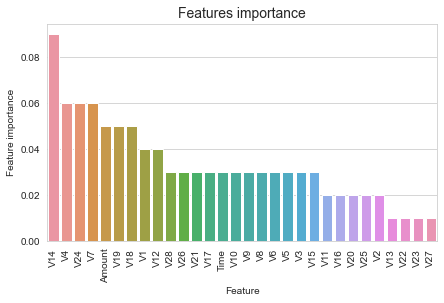

In [39]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

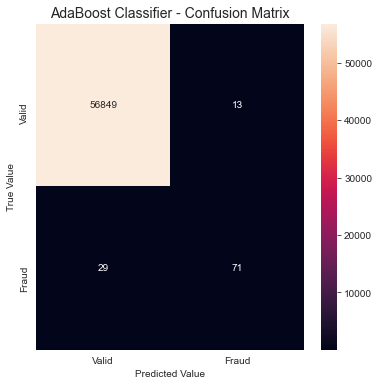

In [41]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("AdaBoost Classifier - Confusion Matrix", fontsize=14) 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

### CatBoost Classifier

In [44]:
!pip install catboost

In [45]:
from catboost import CatBoostClassifier

In [47]:
clf = CatBoostClassifier(iterations=500, learning_rate=0.02, depth=12, eval_metric='AUC', random_seed = 2018, 
                             bagging_temperature = 0.2, od_type='Iter', metric_period = 50, od_wait=100)

In [48]:
clf.fit(X_train, Y_train) 
Y_pred=clf.predict(X_test) 

0:	total: 1.54s	remaining: 12m 47s
50:	total: 48.3s	remaining: 7m 5s
100:	total: 1m 33s	remaining: 6m 10s
150:	total: 2m 18s	remaining: 5m 19s
200:	total: 3m	remaining: 4m 28s
250:	total: 3m 42s	remaining: 3m 40s
300:	total: 4m 25s	remaining: 2m 55s
350:	total: 5m 7s	remaining: 2m 10s
400:	total: 5m 48s	remaining: 1m 26s
450:	total: 6m 31s	remaining: 42.6s
499:	total: 7m 12s	remaining: 0us


In [49]:
print("Model Accuracy:", round(accuracy_score(Y_test, Y_pred),4))
print("Model Precision:", round(precision_score(Y_test, Y_pred),4))
print("Model Recall:", round(recall_score(Y_test, Y_pred),4))

Model Accuracy: 0.9996
Model Precision: 0.9747
Model Recall: 0.77


This model has higher accuracy and precision than Random Forest Classifier

In [52]:
roc_auc_score(Y_test, Y_pred)

0.8849824135626606

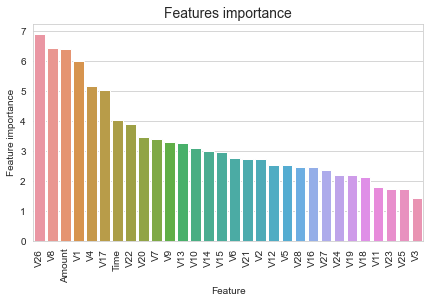

In [50]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

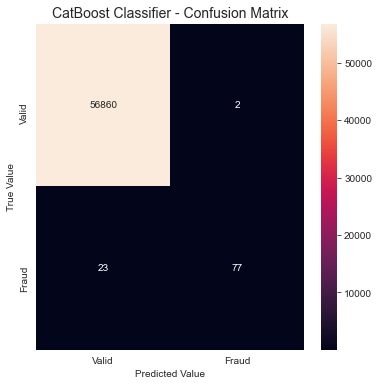

In [51]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("CatBoost Classifier - Confusion Matrix", fontsize=14) 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

### XGBoost

In [3]:
clf= XGBClassifier()

In [58]:
clf.fit(X_train, Y_train) 
Y_pred=clf.predict(X_test) 

C:\Users\Rishika Meel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
print("Model Accuracy:", round(accuracy_score(Y_test, Y_pred),4))
print("Model Precision:", round(precision_score(Y_test, Y_pred),4))
print("Model Recall:", round(recall_score(Y_test, Y_pred),4))

Model Accuracy: 0.9995
Model Precision: 0.9398
Model Recall: 0.78


This model has lower precision but higher recall than that of Random Forest Classifier

In [60]:
roc_auc_score(Y_test, Y_pred)

0.8899560339066511

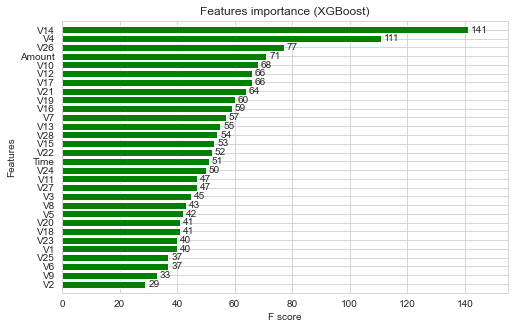

In [64]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(clf, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

## CONCLUSION

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models. The data was split in 3 parts, a train set, a validation set and a test set. For the first three models, we only used the train and test set.

We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.85 when predicting the target for the test set.

We followed with an AdaBoostClassifier model, with lower AUC score (0.83) for prediction of the test set target values.

We then followed with an CatBoostClassifier, with the AUC score after training 500 iterations 0.86.

And at last, we followed XGBClassifier which gave an AUC score of 0.89.

### References

Credit Card Fraud Detection Database, Anonymized credit card transactions labeled as fraudulent or genuine, https://www.kaggle.com/mlg-ulb/creditcardfraud